In [33]:
import os
import datetime
import sys
import random
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import chain

In [34]:
from sklearn.model_selection import train_test_split
import tensorflow.keras.backend as K
import tensorflow as tf
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.merge import concatenate
from keras.models import Model, load_model
from keras.layers import Input, Layer, InputSpec
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D

In [35]:
CFG = {
    'dataset_path': '../data',
    'model_storage': '../dump'
}

IMG_WIDTH = 256
IMG_HEIGHT = 256
IMG_CHANNELS = 3
NUM_SAMPLES = 3083

## Uplodading data

In [36]:
y = np.load(f'{CFG["dataset_path"]}/y_train.npy')
x = np.load(f'{CFG["dataset_path"]}/x_train.npy')

## Uploading trained model

In [38]:
model = tf.keras.models.load_model(f'{CFG["model_storage"]}/unet_tasks_binary_ce.h5', 
    custom_objects={
        'IoU': None,
        'IoU_class_0': None,
        'IoU_class_1': None,
        'IoU_class_2': None,
    })

In [39]:
import matplotlib.pyplot as plt 
pred = model.predict(x[500:900])

In [40]:
pred = (pred*255).astype('uint8')





$$Softmax = \frac{\exp{p_i}} {\sum_{p_j}\exp{p_j}}$$

$$CrossEntropy_{Categorical} = -\sum_{i=1}^{N} w_i * y_i \log{p_i}$$


$$CrossEntropy_{Binary} = -\sum_{i=1}^{N} y_i \log{p_i} - {(1-y_i)} \log{(1-p_i)}$$

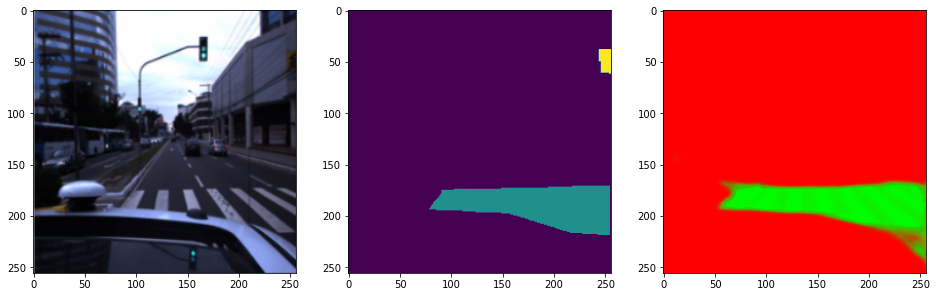

In [58]:
def inspect_image(idx):
    fig, axs = plt.subplots(1,3, figsize=(16,6))
    axs[0].imshow(x[idx + 500])
    axs[1].imshow(y[idx + 500])
    axs[2].imshow(pred[idx])

inspect_image(317)